In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
print('Python version:', sys.version)
print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('Matplotlib version:', matplotlib.__version__)

Python version: 3.10.9 (tags/v3.10.9:1dd9be6, Dec  6 2022, 20:01:21) [MSC v.1934 64 bit (AMD64)]
Pandas version: 2.2.2
Numpy version: 2.1.1
Matplotlib version: 3.9.2


In [36]:
data = pd.read_csv("../work_03/奖牌.csv")
data2 = data.iloc[-5:,:].reset_index(drop=True)
data2

,赛事,参赛人数,金牌,银牌,铜牌,总计,排名
0,2004年雅典,384,32,17,14,63,2
1,2008年北京,639,48,22,30,100,1
2,2012年伦敦,396,38,31,22,91,2
3,2016年里约,412,26,18,26,70,3
4,2020年东京,431,38,32,18,88,2


In [37]:
from matplotlib.patches import FancyBboxPatch
# 圆角柱形图设置函数
def get_round_rect(rects,ec='black',fc='#96c8d6'):
    bb = rects.get_bbox()
    patch = FancyBboxPatch((bb.xmin,bb.ymin), # 左下角的坐标
                          abs(bb.width),abs(bb.height),
                          boxstyle="Round, pad=0, rounding_size=0.05", # 补丁的样式
                          ec=ec,fc=fc,linewidth=1,
                           mutation_aspect=4,
                           mutation_scale=1,
                          )
    return patch

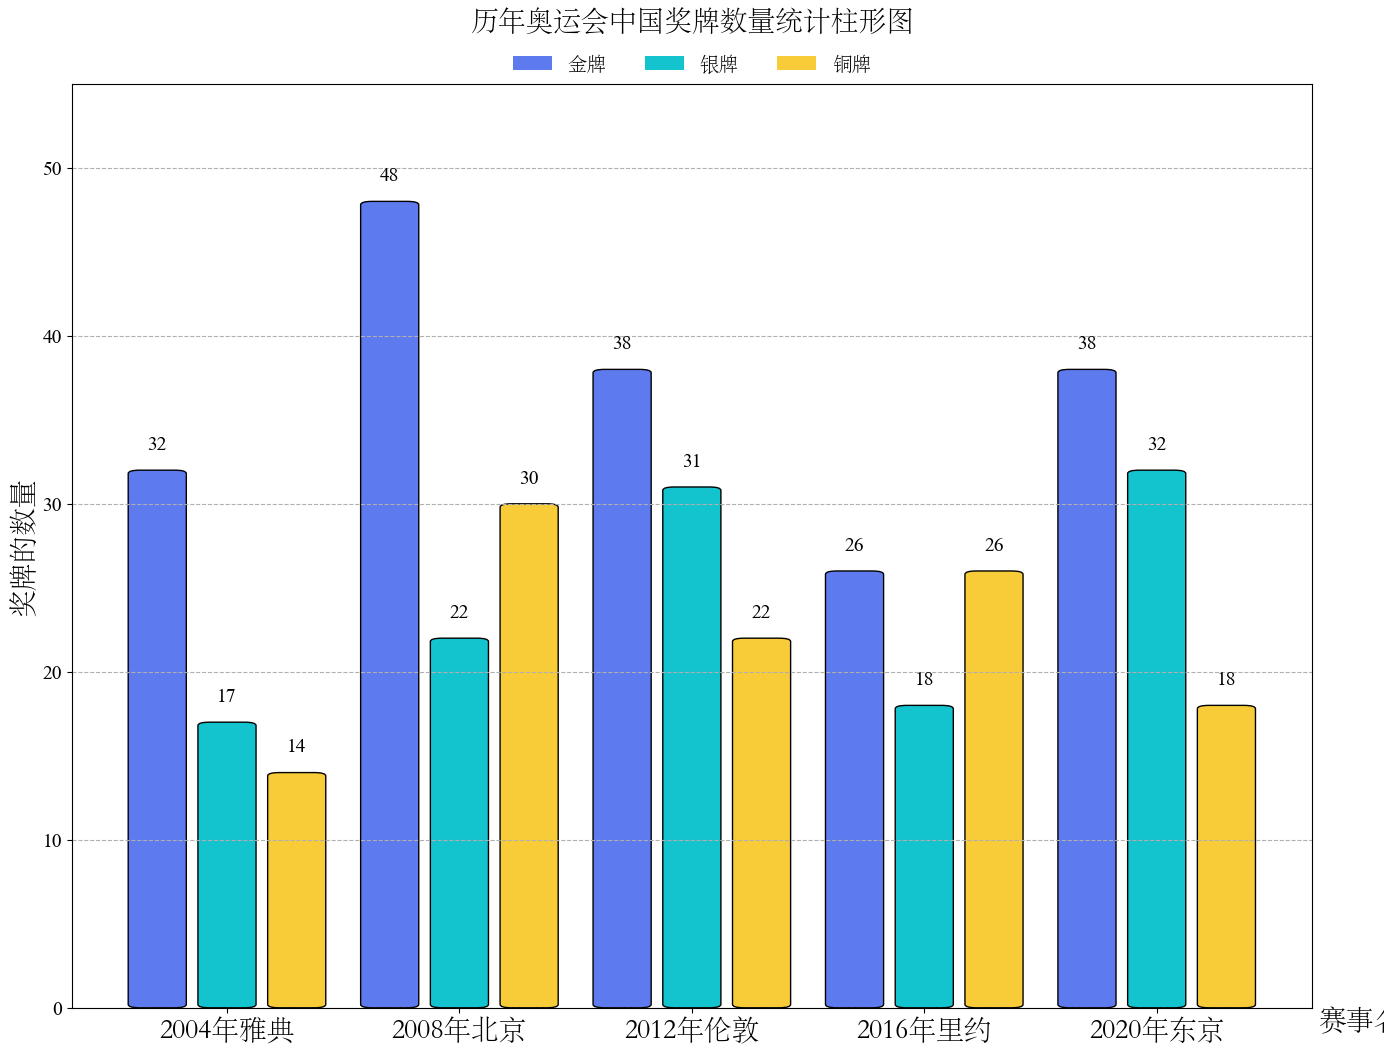

In [56]:
import matplotx
from matplotlib.font_manager import FontProperties
with plt.style.context(matplotx.styles.pitaya_smoothie['light']):
    plt.rcParams['font.sans-serif'] = ["Times New Roman"]
    x = np.arange(data2.shape[0])
    plt.figure(figsize=(16,12),dpi=100)
    rects1 = plt.bar(x-.3,height=data2["金牌"],width=.25,fc="#5d7bee",label = "金牌")
    rects2 = plt.bar(x,height=data2["银牌"],width=.25,fc="#13c4cf",label = "银牌")
    rects3 = plt.bar(x+.3,height=data2["铜牌"],width=.25,fc="#f8cc39",label= "铜牌")
    ax=plt.gca()
    ax.yaxis.grid(True, linestyle='--', which='major')
    ax.xaxis.grid(False)
    for rect in zip(rects1,rects2,rects3):
        rect[0].remove()
        rect[1].remove()
        rect[2].remove()
        patch1 = get_round_rect(rect[0], fc="#5d7bee")
        patch2 = get_round_rect(rect[1], fc="#13c4cf")
        patch3 = get_round_rect(rect[2], fc="#f8cc39")
        ax.add_patch(patch1)
        ax.add_patch(patch2)
        ax.add_patch(patch3)
    plt.ylim(0,55)
    lists = []
    for i in range(data2.shape[0]):
        lists.append(data2.iloc[i,0])
    plt.legend(loc = "upper center",ncol = 3,
               bbox_to_anchor=(0.5, 1.05),
               prop= FontProperties(family='STsong'),
               fancybox = False,
               framealpha = 0)
    plt.xticks(ticks=x,labels=lists,fontproperties='STsong',fontsize = 20)
    for i in range(data2.shape[0]):
        plt.text(x[i]-.3,data2["金牌"][i]+1,data2["金牌"][i],va = "bottom",ha = "center")
        plt.text(x[i],data2["银牌"][i]+1,data2["银牌"][i],va = "bottom",ha = "center")
        plt.text(x[i]+.3,data2["铜牌"][i]+1,data2["铜牌"][i],va = "bottom",ha = "center")
    plt.xlabel("赛事名称",fontdict={"family":"STsong"},fontsize= 20,)
    plt.ylabel("奖牌的数量",fontdict={"family":"STsong"},fontsize= 20)
    ax.xaxis.set_label_coords(1.05 ,0)
    plt.title("历年奥运会中国奖牌数量统计柱形图",fontdict={"family":"STsong"},size=20,y = 1.05)
plt.savefig("C:/Users/wang/Desktop/pyLearn/模块4-数据可视化/figure/作业_奖牌.png")
plt.show()

In [4]:
data = pd.read_csv("./降雨量.csv")
data = data.sort_values(by="Date").reset_index(drop=True)
data["Date"] = pd.to_datetime(data["Date"]).dt.strftime('%Y-%m')
data.head()

,Date,Value_2015,Value_2016
0,2015-01,3.9,NaN
1,2015-02,5.9,NaN
2,2015-03,11.1,NaN
3,2015-04,18.7,NaN
4,2015-05,48.3,NaN


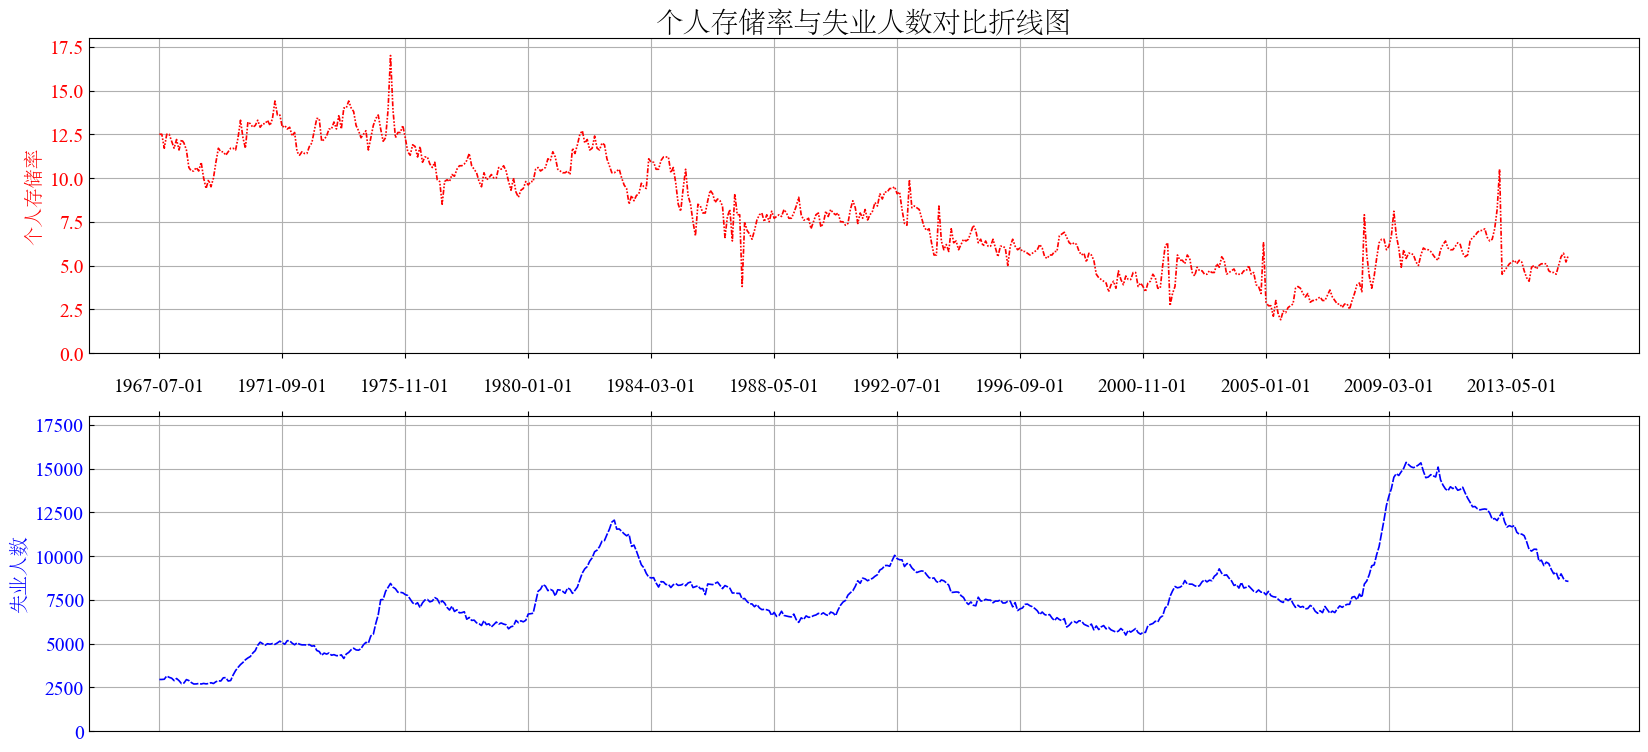

In [32]:
data = pd.read_csv("C:/Users/wang/Desktop/pyLearn/模块4-数据可视化/data/economics.csv")
plt.figure(figsize=(20, 9), dpi=100)
plt.subplot(211)
plt.plot(data['date'], data['psavert'], label='个人存储率',
         color='red', linewidth=1.2, linestyle=(0, (3, 1, 1, 1, 1, 1)))
# 设置 x 轴刻度标签每隔 40 个显示一次，并倾斜 45 度
plt.tick_params(axis='x',direction='out',pad=14)
plt.xticks(np.arange(0, data.shape[0], 50))

plt.ylim(0, 18)  # 设置 y 轴范围为 0 到 18
plt.ylabel('个人存储率',fontdict={'family':'STsong'}, color='red')  # 设置 y 轴标签和颜色
plt.tick_params(axis='y', labelcolor='red',direction='in')  # 设置 y 轴刻度标签颜色
plt.grid()

plt.title('个人存储率与失业人数对比折线图', fontdict={'family':'STsong','size': 20})  # 设置标题

plt.subplot(212)
# 绘制失业人数折线图
plt.plot(data['date'], data['unemploy'], label='失业人数',
         color='blue', linewidth=1.2, linestyle=(0, (5, 1)))

plt.xticks(np.arange(0,data.shape[0],50)) # x轴刻度标签每隔40个显示一次,并做倾斜45,以显示更多
plt.ylim(0,18000)
plt.ylabel('失业人数',fontdict={'family':'STsong'},color='blue')
plt.tick_params(axis='y',labelcolor='blue',direction='in')
plt.tick_params(axis='x',
                bottom=False, # 关闭底部的刻度指示器
                labelbottom=False, # 关闭底部的刻度标签
                direction='out', # 刻度指示器的朝向
                top=True) # 开启顶部的刻度指示器.
plt.grid()
plt.show()

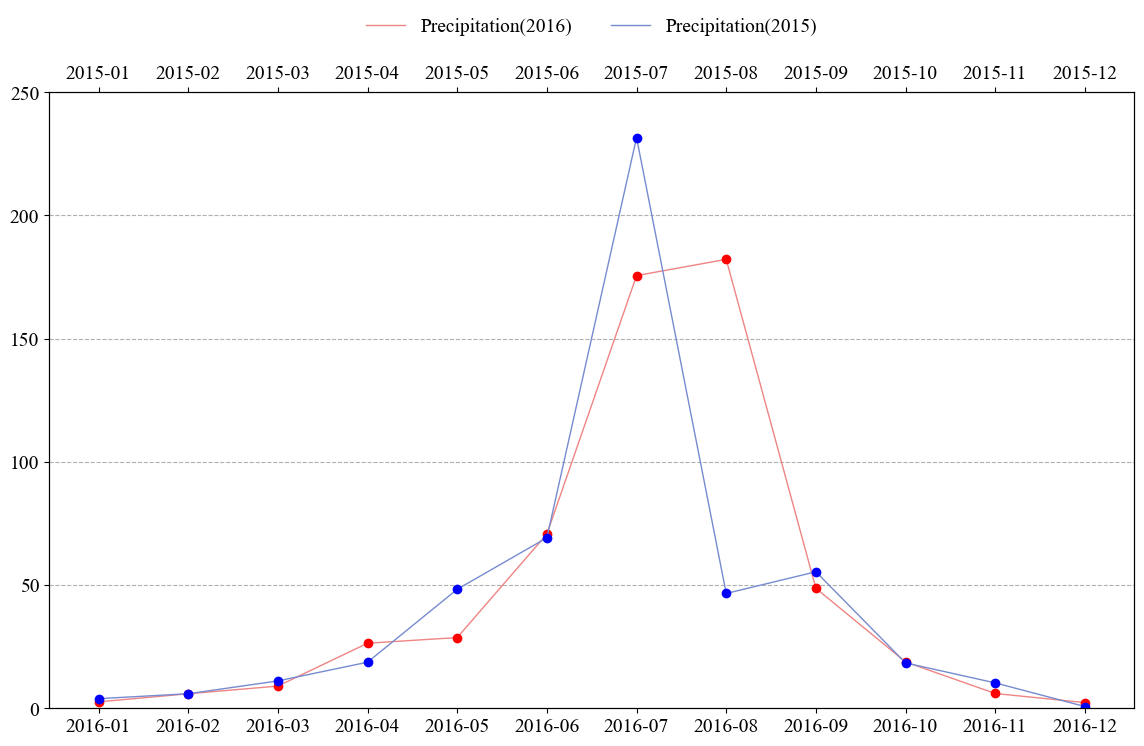

In [26]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
fig, ax1 = plt.subplots(figsize=(14,8), dpi=100)
ax1.plot(data.loc[12:]["Date"],data.loc[12:]["Value_2016"], lw=1, color='#ef8484', label='Precipitation(2016)')
ax1.plot(data.loc[12:]["Date"],data.loc[12:]["Value_2016"], 'ro')
ax1.grid(axis='y', linestyle='--', which='major')
ax2 = ax1.twiny()
ax2.plot(data.loc[:12]["Date"],data.loc[:12]["Value_2015"], lw=1, color='#768bcf', label='Precipitation(2015)')
ax2.plot(data.loc[:12]["Date"],data.loc[:12]["Value_2015"], 'bo')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines,labels,loc = "upper center",ncol = 2,
               bbox_to_anchor=(0.5, 1.15),
               fancybox = False,
               framealpha = 0)
plt.ylim(0,250)
plt.savefig("C:/Users/wang/Desktop/pyLearn/模块4-数据可视化/figure/作业_降雨量.png")
plt.show()